In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import geopandas as gp

SHP_DE = Path.cwd().parents[0] /"Europe_coastline_shapefile"/"nuts1000_01-01.DE"/"nuts1000_01-01.gk3.shape"/"nuts1000_0101"/"1000_NUTS1.shp"
SHP_UK = Path.cwd().parents[0] / "Europe_coastline_shapefile"/"NUTS_Level_1_UK"/"NUTS_Level_1_(January_2018)_Boundaries.shp"
CRS_GK3 = "epsg:31467"
CRS_WGS = "epsg:4326"
CRS_PROJ = "epsg:3857"
OUTPUT = Path.cwd().parents[0] / "Output"
SENTI_CSV = Path.cwd().parents[0] / "Output" / "df_senti.csv"

shp_de = gp.read_file(SHP_DE,crs = CRS_GK3)
shp_uk =gp.read_file(SHP_UK,crs = CRS_WGS )
df = pd.read_csv(SENTI_CSV)


/home/sagnik/miniconda3/envs/workshop_env/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


<AxesSubplot:>

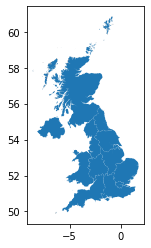

In [64]:
shp_uk.plot()

In [2]:
gdf = gp.GeoDataFrame(df.drop(columns = ['post_publish_date','Unnamed: 0','post_language']),
                              geometry = gp.points_from_xy(df.long,df.lat),
                              crs = CRS_WGS)
gdf.drop(columns = ['long', 'lat'],inplace = True)
gdf

,hashtags,emoji,Month/Year,Year,polarity,subjectivity,geometry
0,Fluechtlinge,NaN,2017-01,2017,0.00,0.0,POINT (7.11659 50.70347)
1,Refugees,NaN,2017-01,2017,0.00,1.0,POINT (13.42461 52.50670)
2,"ironisch,Einwanderer,Zuwanderung,Angst,USA",🤔,2017-01,2017,0.15,0.0,POINT (13.42461 52.50670)
3,"sexy,hot,hamburg,Germany,Immigrants",NaN,2017-01,2017,0.00,0.0,POINT (9.37268 53.67989)
4,"Fluechtlinge,Ghettos,Familiennachzug,NO",NaN,2017-01,2017,-0.50,0.0,POINT (8.63450 53.66480)
...,...,...,...,...,...,...,...
92345,"terrorism,Juncker,migration",NaN,2017-01,2017,-0.20,0.9,POINT (4.47677 50.50117)
92346,"EU2017MT,migration",NaN,2017-01,2017,0.00,0.0,POINT (14.38005 35.93425)
92347,"RussianDissident,Asylum",🇫🇷,2017-01,2017,0.00,0.0,POINT (-3.70351 40.47779)
92348,"Victory,Birds,Gaggle,VFlight,Margate,Geese,Mig...",😊,2017-01,2017,0.00,0.0,POINT (1.35792 51.37948)


In [3]:
gdf_uk = gp.sjoin(gdf,shp_uk, how ="right", op ="within")
gdf_uk

,index_left,hashtags,emoji,Month/Year,Year,polarity,subjectivity,objectid,nuts118cd,nuts118nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,47226,deport,NaN,2018-02,2018,0.800000,0.750000,1,UKC,North East (England),417313,600358,-1.72890,55.297031,8.592429e+09,1.008435e+06,"MULTIPOLYGON (((-2.02415 55.77117, -2.02442 55..."
0,59061,"OurRedcarClevenad,immigration",NaN,2019-06,2019,0.136364,0.454545,1,UKC,North East (England),417313,600358,-1.72890,55.297031,8.592429e+09,1.008435e+06,"MULTIPOLYGON (((-2.02415 55.77117, -2.02442 55..."
0,39404,refugeeswelcome,NaN,2017-07,2017,0.000000,0.000000,1,UKC,North East (England),417313,600358,-1.72890,55.297031,8.592429e+09,1.008435e+06,"MULTIPOLYGON (((-2.02415 55.77117, -2.02442 55..."
0,86457,ChildRefugees,NaN,2016-10,2016,0.000000,0.500000,1,UKC,North East (England),417313,600358,-1.72890,55.297031,8.592429e+09,1.008435e+06,"MULTIPOLYGON (((-2.02415 55.77117, -2.02442 55..."
0,22446,"marr,MuslimBan",NaN,2017-01,2017,-0.083333,0.145833,1,UKC,North East (England),417313,600358,-1.72890,55.297031,8.592429e+09,1.008435e+06,"MULTIPOLYGON (((-2.02415 55.77117, -2.02442 55..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,65604,WorldRefugeeDay,NaN,2020-06,2020,0.000000,0.400000,12,UKN,Northern Ireland,86601,535325,-6.85481,54.614941,1.433343e+10,1.131177e+06,"MULTIPOLYGON (((-6.48211 55.25195, -6.48208 55..."
11,59010,"DiscoverCultureEmbraceDiversity,RefugeeIntergr...",NaN,2019-05,2019,0.000000,0.000000,12,UKN,Northern Ireland,86601,535325,-6.85481,54.614941,1.433343e+10,1.131177e+06,"MULTIPOLYGON (((-6.48211 55.25195, -6.48208 55..."
11,60490,refugeecontactandsocialconnection,NaN,2019-07,2019,1.000000,0.300000,12,UKN,Northern Ireland,86601,535325,-6.85481,54.614941,1.433343e+10,1.131177e+06,"MULTIPOLYGON (((-6.48211 55.25195, -6.48208 55..."
11,76990,"eu,immigration,NHS,Brexit,economy",NaN,2016-06,2016,0.000000,0.000000,12,UKN,Northern Ireland,86601,535325,-6.85481,54.614941,1.433343e+10,1.131177e+06,"MULTIPOLYGON (((-6.48211 55.25195, -6.48208 55..."


In [5]:

gdf_de = gp.sjoin(gdf,shp_de.to_crs(CRS_WGS), how ="right", op ="within")
gdf_de

,index_left,hashtags,emoji,Month/Year,Year,polarity,subjectivity,GF,NUTS_LEVEL,NUTS_CODE,NUTS_NAME,geometry
0,18749.0,"Arbeitslosigkeit,refugees,Juncker,EU",NaN,2016-12,2016.0,0.0,0.00,4,1,DE1,Baden-Württemberg,"MULTIPOLYGON (((10.08382 48.19806, 10.08421 48..."
0,18750.0,"schland,Refugees,EU",NaN,2016-12,2016.0,-0.5,0.00,4,1,DE1,Baden-Württemberg,"MULTIPOLYGON (((10.08382 48.19806, 10.08421 48..."
0,18748.0,"schlandgewählte,Europa,Refugees,EU",NaN,2016-12,2016.0,0.0,0.00,4,1,DE1,Baden-Württemberg,"MULTIPOLYGON (((10.08382 48.19806, 10.08421 48..."
0,18700.0,"refugees,Humans",NaN,2016-12,2016.0,0.0,0.00,4,1,DE1,Baden-Württemberg,"MULTIPOLYGON (((10.08382 48.19806, 10.08421 48..."
0,45655.0,"Christmas,refugee",NaN,2017-12,2017.0,0.6,0.95,4,1,DE1,Baden-Württemberg,"MULTIPOLYGON (((10.08382 48.19806, 10.08421 48..."
...,...,...,...,...,...,...,...,...,...,...,...,...
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,DE5,Bremen,"POLYGON ((8.57469 53.53879, 8.57546 53.53677, ..."
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,DE6,Hamburg,"POLYGON ((9.78623 53.55959, 9.81145 53.55469, ..."
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,DE8,Mecklenburg-Vorpommern,"MULTIPOLYGON (((11.25738 53.97663, 11.25521 53..."
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,DE9,Niedersachsen,"MULTIPOLYGON (((7.21131 53.24557, 7.20875 53.2..."


In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols =2, nrows =1, figsize =(15,8))
gdf_uk.plot(ax =ax1,column = 'polarity')
gdf_uk.plot(ax =ax2,column ='subjectivity')